In [2]:

from keras.utils import np_utils
from tensorflow.keras.datasets import mnist
from tensorflow.keras.initializers import RandomNormal
from sklearn.model_selection import train_test_split 

%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import time
import pandas as pd
import csv

In [3]:
#Importing the Data and Splitting for Training and Modelling
#data = pd.read_csv('testdata.csv')
#X = data[data.columns[0:9]]
#Y = data.loc[:,'Potability']
#x_train, x_test, y_train, y_test = train_test_split (X,Y, test_size=0.2, train_size=0.8 )
#train = pd.concat([x_train, y_train], axis=1)
#test = pd.concat([x_test, y_test], axis=1)
#Exporting data to the CSV
#test.to_csv('testWP.csv')
#train.to_csv('validWP.csv')
# COMPLETED and SAVED

#Importing Segmented Data
test = pd.read_csv('testWP.csv')
train = pd.read_csv('trainWP.csv')

test = test[test.columns[1:11]]  #Dropping Index Values
train =  train[train.columns[1:11]]

x_test= test[test.columns[0:9]] #Partitioning Test Set
y_test = test.loc[:,'Potability']

x_train = train[train.columns[0:9]]  #Partitioning Train Set
y_train = train.loc[:,'Potability']
                    
                    
#Experimenting with Normalized Inputs
mean = x_train.mean()
#mean = mean[0:10]

std = x_train.std()


x_Ntest=(x_test-mean)/std
x_Ntrain=(x_train-x_train.mean())/x_train.std()




In [9]:
#Experimenting with One-Hot Encoding
y_Htrain = np.empty([len(y_train),2])
y_Htrain[:,0] = y_train
y_Htrain[:,1]= 1-y_train

y_Htest = np.empty([len(y_test),2])
y_Htest[:,0] = y_test
y_Htest[:,1]= 1-y_test


In [26]:
from keras.layers import Activation, Dense
from keras.models import Sequential 
from keras import optimizers

#Building the Model
model = Sequential()
model.add(Dense(300, input_dim=9))
model.add(Activation('relu'))
model.add(Dense(2))
model.add(Activation('sigmoid'))

#model.summary()
model.compile(optimizer= 'adam', loss='binary_crossentropy',metrics=['accuracy']) #Building the Model

training = model.fit(x_Ntrain, y_Htrain, batch_size=200, epochs=145, verbose=1, validation_data=(x_Ntest,y_Htest))

Epoch 1/145
14/14 [==============================] - 1s 20ms/step - loss: 0.6901 - accuracy: 0.5393 - val_loss: 0.6599 - val_accuracy: 0.6372
Epoch 2/145
14/14 [==============================] - 0s 4ms/step - loss: 0.6662 - accuracy: 0.6031 - val_loss: 0.6498 - val_accuracy: 0.6372
Epoch 3/145
14/14 [==============================] - 0s 4ms/step - loss: 0.6560 - accuracy: 0.6195 - val_loss: 0.6475 - val_accuracy: 0.6509
Epoch 4/145
14/14 [==============================] - 0s 4ms/step - loss: 0.6478 - accuracy: 0.6359 - val_loss: 0.6397 - val_accuracy: 0.6570
Epoch 5/145
14/14 [==============================] - 0s 4ms/step - loss: 0.6400 - accuracy: 0.6374 - val_loss: 0.6308 - val_accuracy: 0.6601
Epoch 6/145
14/14 [==============================] - 0s 5ms/step - loss: 0.6322 - accuracy: 0.6466 - val_loss: 0.6267 - val_accuracy: 0.6723
Epoch 7/145
14/14 [==============================] - 0s 5ms/step - loss: 0.6260 - accuracy: 0.6672 - val_loss: 0.6239 - val_accuracy: 0.6707
Epoch 8/145


Epoch 59/145
14/14 [==============================] - 0s 5ms/step - loss: 0.5593 - accuracy: 0.7095 - val_loss: 0.5896 - val_accuracy: 0.6982
Epoch 60/145
14/14 [==============================] - 0s 5ms/step - loss: 0.5583 - accuracy: 0.7126 - val_loss: 0.5918 - val_accuracy: 0.6829
Epoch 61/145
14/14 [==============================] - 0s 4ms/step - loss: 0.5573 - accuracy: 0.7153 - val_loss: 0.5906 - val_accuracy: 0.6875
Epoch 62/145
14/14 [==============================] - 0s 4ms/step - loss: 0.5569 - accuracy: 0.7130 - val_loss: 0.5907 - val_accuracy: 0.6966
Epoch 63/145
14/14 [==============================] - 0s 4ms/step - loss: 0.5574 - accuracy: 0.7115 - val_loss: 0.5871 - val_accuracy: 0.6875
Epoch 64/145
14/14 [==============================] - 0s 4ms/step - loss: 0.5560 - accuracy: 0.7134 - val_loss: 0.5922 - val_accuracy: 0.6951
Epoch 65/145
14/14 [==============================] - 0s 5ms/step - loss: 0.5545 - accuracy: 0.7130 - val_loss: 0.5929 - val_accuracy: 0.6951
Epoch 

<IPython.core.display.Javascript object>


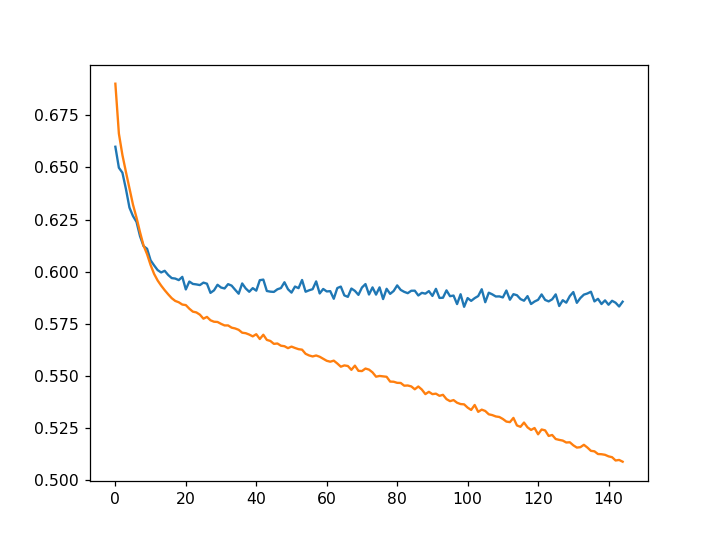

In [28]:
xl = list(range(145))
vy = training.history['val_loss']
ty = training.history['loss']

plt.plot( xl, vy,  label='Validation' )
plt.plot( xl, ty, label='Train' )
plt.show()


<IPython.core.display.Javascript object>


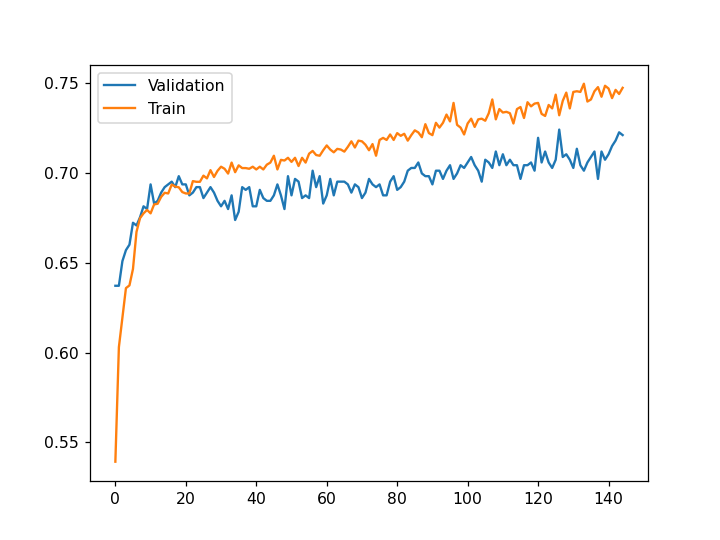

In [29]:
xl = list(range(145))
vy = training.history['val_accuracy']
ty = training.history['accuracy']

plt.plot( xl, vy,  label='Validation' )
plt.plot( xl, ty, label='Train' )
plt.legend()
plt.show()


In [35]:
from sklearn.metrics import confusion_matrix
y_Hpred = model.predict(x_Ntest)
y_Hpred = np.round(y_Hpred, decimals=0)

confusion_matrix(y_Htest[:,0], y_Hpred[:,0])


array([[353,  65],
       [124, 114]], dtype=int64)

In [96]:




#Experimenting with Improvements from Imputated Data
data1 = pd.read_csv('Water Potability.csv')
data1 = data1.dropna()

X1 = data1[data1.columns[0:9]]
Y1 = data1.loc[:,'Potability']

x_train1, x_test1, y_train1, y_test1 = train_test_split (X1,Y1, test_size=0.2, train_size=0.8 )

x_Ntest1=(x_test1-mean)/std
x_Ntrain1=(x_train1-mean)/std


x_Ntrain.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,-0.048779,0.695870,-0.665159,0.336133,0.604112,-1.763756,0.907199,-0.101168,-0.771859
1,1.023181,0.036070,-0.686810,-1.432636,-0.607229,0.477874,1.339704,-1.677637,-0.585608
2,-2.474359,-1.342042,-0.637756,-0.729593,-0.565866,-0.159470,-1.294558,0.117303,0.177647
3,0.887550,1.582085,0.674431,-0.013989,0.257413,0.093135,1.316254,-0.847582,2.216139
4,-0.102772,1.711090,-1.234515,1.822175,-1.315745,-0.704262,0.854088,-1.459160,-0.877071


In [98]:
training = model.fit(x_Ntrain1, y_train1, batch_size=300, epochs=50, verbose=1, validation_data=(x_Ntest1,y_test1))

Epoch 1/50
6/6 [==============================] - 0s 22ms/step - loss: 0.5759 - accuracy: 0.7114 - val_loss: 0.5786 - val_accuracy: 0.7097
Epoch 2/50
6/6 [==============================] - 0s 11ms/step - loss: 0.5756 - accuracy: 0.7121 - val_loss: 0.5788 - val_accuracy: 0.7072
Epoch 3/50
6/6 [==============================] - 0s 10ms/step - loss: 0.5754 - accuracy: 0.7121 - val_loss: 0.5790 - val_accuracy: 0.7072
Epoch 4/50
6/6 [==============================] - 0s 9ms/step - loss: 0.5752 - accuracy: 0.7139 - val_loss: 0.5793 - val_accuracy: 0.7022
Epoch 5/50
6/6 [==============================] - 0s 9ms/step - loss: 0.5749 - accuracy: 0.7139 - val_loss: 0.5793 - val_accuracy: 0.7022
Epoch 6/50
6/6 [==============================] - 0s 10ms/step - loss: 0.5747 - accuracy: 0.7133 - val_loss: 0.5794 - val_accuracy: 0.7022
Epoch 7/50
6/6 [==============================] - 0s 9ms/step - loss: 0.5744 - accuracy: 0.7139 - val_loss: 0.5795 - val_accuracy: 0.7022
Epoch 8/50
6/6 [==============

In [ ]:
training = model.fit(x_train, y_train, batch_size=300, epochs=50, verbose=0, validation_data=(x_test,y_test))

In [99]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(5, 2), random_state=1)
clf.fit(x_train, y_train)
clf.score(x_test, y_test)

0.6371951219512195

In [112]:
clf1 = MLPClassifier(solver='adam', alpha=2e-4,hidden_layer_sizes=(6, 3), random_state=1, max_iter=1000)
clf1.fit(x_Ntrain, y_train)
clf1.score(x_Ntest, y_test)

0.6692073170731707

In [111]:
clf1 = MLPClassifier(solver='adam', alpha=2e-4,hidden_layer_sizes=(6, 3), random_state=1, max_iter=400)
clf1.fit(x_Ntrain1, y_train1)
clf1.score(x_Ntest1, y_test1)

0.7196029776674938

In [109]:
clf2 = MLPClassifier(solver='adam', alpha=1e-5,hidden_layer_sizes=(6, 8), random_state=1, max_iter=1000)
clf2.fit(x_Ntrain1, y_train1)
clf2.score(x_Ntest1, y_test1)

0.6923076923076923

In [1]:
clf1 = MLPClassifier(solver='adam', alpha=1e-4,hidden_layer_sizes=(10,10), random_state=1, verbose=True, max_iter=400)
clf1.fit(x_Ntrain, y_train)
clf1.score(x_Ntest, y_test)

NameError: name 'MLPClassifier' is not defined